In [37]:
#imports
import pandas as pd
import panel as pn
import matplotlib.pyplot as plt
import numpy as np

# intro

The purpose of this project is to create a data dashboard suited for interactivity and visually representing zooarchelogical data for our client.

# about the data

The data for this project concerns a dataset acquired from [opencontext.org](https://opencontext.org/) specifically one that our client, [Sarah Whitcher Kansa](https://opencontext.org/about/people), contributed to. The dataset we begin with is the [Domuztepe Excavations](https://opencontext.org/projects/e6fb0f7c-6f69-6ca8-683b-8c6d5e98a099) dataset, this dataset contains the objects and zooarcheological features found at the Domuztepe Excavation site. The dataset contains a variety of data about these objects including the wgs formatted coordinates the object was found at, the dating, the item category and many more such things.

The reason this particular dataset was chosen was the contribution of the client of this project and the present data varity compared to other datasets I was able to find on [opencontext](https://opencontext.org/). As of the writing of this my contact person has not had contact with our client yet but has stated that he is in the process of contacting our client. So after consulting with the contact person I have gained approval for developement of the data dashboard using this dataset.

After further discussion with my contact person we have decided to continue with the [EOL Computational Data Challenge: Primary Zooarchaeology Dataset](https://opencontext.org/tables/f07bce4f-b08c-fe92-6505-c9e534d89a09). We chose this dataset because the client is a contributor towards it and because of the increased variety of data within this dataset

# data exploration

after loading in the data with pandas using the code below we can explore the composition of the data with the built in functions that pandas offers

In [3]:
def read_dataframe(dataframe_filepath):
    df = pd.read_csv(dataframe_filepath, low_memory=False)
    return df

df = read_dataframe("~/Downloads/f07bce4f-b08c-fe92-6505-c9e534d89a09--v1--full.csv")

In [8]:
print("shape of dataframe: ",df.shape)

df_uniques = df.nunique()
print("dataframe uniques:\n",df_uniques)

print("dataframe description pandas", df.describe())


shape of dataframe:  (239320, 37)
dataframe uniques:
 URI                                             239320
Label                                           188514
Project                                             12
Project URI                                         12
Item Category                                        1
Last Updated                                         3
Authorship                                         165
Latitude (WGS-84)                                   15
Longitude (WGS-84)                                  15
Geospatial note                                      1
Early Date (BCE/CE)                                 23
Late Date (BCE/CE)                                  19
Context URI                                       3955
Context (1)                                          1
Context (2)                                         12
Context (3)                                        218
Context (4)                                       1046
Context (5)

In [15]:
print(df_uniques)


URI                                             239320
Label                                           188514
Project                                             12
Project URI                                         12
Item Category                                        1
Last Updated                                         3
Authorship                                         165
Latitude (WGS-84)                                   15
Longitude (WGS-84)                                  15
Geospatial note                                      1
Early Date (BCE/CE)                                 23
Late Date (BCE/CE)                                  19
Context URI                                       3955
Context (1)                                          1
Context (2)                                         12
Context (3)                                        218
Context (4)                                       1046
Context (5)                                       2115
Context (6

In [ ]:
print((df_uniques/df.notnull)*100)

URI                                             100.000000
Label                                            78.770684
Project                                           0.005014
Project URI                                       0.005014
Item Category                                     0.000418
Last Updated                                      0.001254
Authorship                                        0.068945
Latitude (WGS-84)                                 0.006268
Longitude (WGS-84)                                0.006268
Geospatial note                                   0.000418
Early Date (BCE/CE)                               0.009611
Late Date (BCE/CE)                                0.007939
Context URI                                       1.652599
Context (1)                                       0.000418
Context (2)                                       0.005014
Context (3)                                       0.091091
Context (4)                                       0.4370

In [ ]:
df_uniques["percentage"] = 

In [27]:
df_notna = df.notna()

In [ ]:
print(type(df_notna))

<class 'pandas.core.frame.DataFrame'>          URI  Label  Project  Project URI  Item Category  Last Updated  \
0       True   True     True         True           True          True   
1       True   True     True         True           True          True   
2       True   True     True         True           True          True   
3       True   True     True         True           True          True   
4       True   True     True         True           True          True   
...      ...    ...      ...          ...            ...           ...   
239315  True   True     True         True           True          True   
239316  True   True     True         True           True          True   
239317  True   True     True         True           True          True   
239318  True   True     True         True           True          True   
239319  True   True     True         True           True          True   

        Authorship  Latitude (WGS-84)  Longitude (WGS-84)  Geospatial not

In [29]:
df_notna

,URI,Label,Project,Project URI,Item Category,Last Updated,Authorship,Latitude (WGS-84),Longitude (WGS-84),Geospatial note,...,Has Biological Taxonomy [Source],Has fusion character [Proximal URI],Has fusion character [Proximal Label],Has fusion character [Proximal Source],Has fusion character [Distal URI],Has fusion character [Distal Label],Has fusion character [Distal Source],Has physiological sex determination [URI],Has physiological sex determination [Label],Has physiological sex determination [Source]
0,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239315,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,True
239316,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,True
239317,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,True
239318,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,True


In [22]:
df_notna.count()

URI                                             239320
Label                                           239320
Project                                         239320
Project URI                                     239320
Item Category                                   239320
Last Updated                                    239320
Authorship                                      239320
Latitude (WGS-84)                               239320
Longitude (WGS-84)                              239320
Geospatial note                                 239320
Early Date (BCE/CE)                             239320
Late Date (BCE/CE)                              239320
Context URI                                     239320
Context (1)                                     239320
Context (2)                                     239320
Context (3)                                     239320
Context (4)                                     239320
Context (5)                                     239320
Context (6

In [32]:
(df.count()/239320) * 100

URI                                             100.000000
Label                                           100.000000
Project                                         100.000000
Project URI                                     100.000000
Item Category                                   100.000000
Last Updated                                    100.000000
Authorship                                      100.000000
Latitude (WGS-84)                               100.000000
Longitude (WGS-84)                              100.000000
Geospatial note                                 100.000000
Early Date (BCE/CE)                             100.000000
Late Date (BCE/CE)                              100.000000
Context URI                                     100.000000
Context (1)                                     100.000000
Context (2)                                     100.000000
Context (3)                                     100.000000
Context (4)                                      94.8261

In [34]:
print(list(df_uniques.index))
print(list((df.count()/239320) * 100))


['URI', 'Label', 'Project', 'Project URI', 'Item Category', 'Last Updated', 'Authorship', 'Latitude (WGS-84)', 'Longitude (WGS-84)', 'Geospatial note', 'Early Date (BCE/CE)', 'Late Date (BCE/CE)', 'Context URI', 'Context (1)', 'Context (2)', 'Context (3)', 'Context (4)', 'Context (5)', 'Context (6)', 'Context (7)', 'Context (8)', 'Context (9)', 'Has anatomical identification [URI]', 'Has anatomical identification [Label]', 'Has anatomical identification [Source]', 'Has Biological Taxonomy [URI]', 'Has Biological Taxonomy [Label]', 'Has Biological Taxonomy [Source]', 'Has fusion character [Proximal URI]', 'Has fusion character [Proximal Label]', 'Has fusion character [Proximal Source]', 'Has fusion character [Distal URI]', 'Has fusion character [Distal Label]', 'Has fusion character [Distal Source]', 'Has physiological sex determination [URI]', 'Has physiological sex determination [Label]', 'Has physiological sex determination [Source]']
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0,

<BarContainer object of 37 artists>

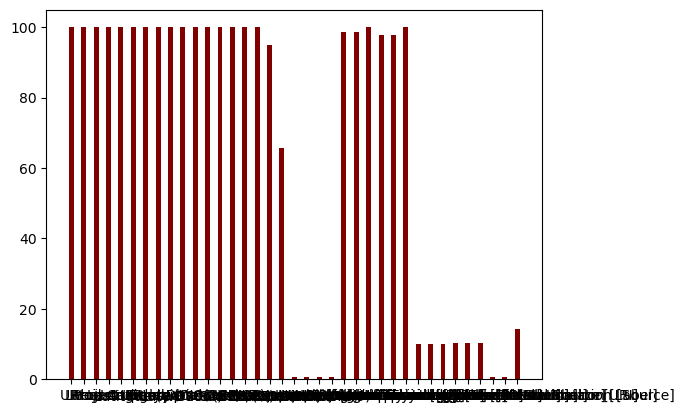

In [38]:
plt.bar(list(df_uniques.index), list((df.count()/239320) * 100), color ='maroon', width = 0.4)

# developement of the app

For the developement of this app we will be using the python language and primarily the panel package for the construction of our dashboard. But all the used packages are too much to discuss each individually and as such I will display all the used packages for this project in the table below along with their versions and intended uses for this project.

|package name|version|intended use|
|---|---|---|
|panel|1.3.8|the visual construction of our data dashboard and interactive components for the end user|
|pandas|2.1.4|data manipulation (filtering)|
|numpy|1.26.4|calculations on the largescale data|

Due to my lack of experience with thy python package panel in particular I initially tried to contain the creation of panels and the process of displaying these panels within functions but after further consultation with my contact person I have been informed that the panel package is meant to be used as top level code.